## **About the dataset**
The dataset contains information about celestial bodies, including asteroids and other objects in our solar system. It provides various attributes such as the object's ID, name, prefix, whether it is a near-Earth object (NEO) or potentially hazardous (PHA), its absolute magnitude (H), diameter, albedo, and other orbital parameters.

The dataset offers valuable insights into the characteristics and classifications of celestial bodies. It includes data on different classes of objects, such as Main Belt Asteroids (MBA) and Potentially Hazardous Asteroids (PHA), allowing for the analysis of their distributions and properties. The dataset also provides information on the uncertainty of orbital parameters, represented by the sigma values.

With this dataset, one can explore and visualize the distribution of diameters, albedo, and absolute magnitudes across different classes of celestial bodies. It enables the identification of outliers and the examination of correlations between attributes, such as diameter and albedo. Additionally, the dataset allows for the identification and visualization of the most common classes of celestial bodies present.

Overall, this dataset serves as a valuable resource for conducting data analysis and gaining insights into the characteristics and classifications of celestial bodies in our solar system.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("/content/dataset.csv")

In [3]:
df.head()

,id,spkid,full_name,pdes,name,prefix,neo,pha,H,diameter,...,sigma_i,sigma_om,sigma_w,sigma_ma,sigma_ad,sigma_n,sigma_tp,sigma_per,class,rms
0,a0000001,2000001,1 Ceres,1,Ceres,NaN,N,N,3.40,939.400,...,4.608900e-09,6.168800e-08,6.624800e-08,7.820700e-09,1.111300e-11,1.196500e-12,3.782900e-08,9.415900e-09,MBA,0.43301
1,a0000002,2000002,2 Pallas,2,Pallas,NaN,N,N,4.20,545.000,...,3.469400e-06,6.272400e-06,9.128200e-06,8.859100e-06,4.961300e-09,4.653600e-10,4.078700e-05,3.680700e-06,MBA,0.35936
2,a0000003,2000003,3 Juno,3,Juno,NaN,N,N,5.33,246.596,...,3.223100e-06,1.664600e-05,1.772100e-05,8.110400e-06,4.363900e-09,4.413400e-10,3.528800e-05,3.107200e-06,MBA,0.33848
3,a0000004,2000004,4 Vesta,4,Vesta,NaN,N,N,3.00,525.400,...,2.170600e-07,3.880800e-07,1.789300e-07,1.206800e-06,1.648600e-09,2.612500e-10,4.103700e-06,1.274900e-06,MBA,0.39980
4,a0000005,2000005,5 Astraea,5,Astraea,NaN,N,N,6.90,106.699,...,2.740800e-06,2.894900e-05,2.984200e-05,8.303800e-06,4.729000e-09,5.522700e-10,3.474300e-05,3.490500e-06,MBA,0.52191


In [4]:
df.tail()

,id,spkid,full_name,pdes,name,prefix,neo,pha,H,diameter,...,sigma_i,sigma_om,sigma_w,sigma_ma,sigma_ad,sigma_n,sigma_tp,sigma_per,class,rms
50862,a0050863,2050863,50863 (2000 GN1),50863,NaN,NaN,N,N,14.6,3.898,...,0.000005,0.000013,0.000022,0.000017,1.267400e-08,1.460700e-09,0.000076,0.000010,MBA,0.50703
50863,a0050864,2050864,50864 (2000 GM2),50864,NaN,NaN,N,N,13.1,8.518,...,0.000004,0.000021,0.000068,0.000063,1.845100e-08,1.664300e-09,0.000336,0.000017,MBA,0.46720
50864,a0050865,2050865,50865 (2000 GU2),50865,NaN,NaN,N,N,14.8,NaN,...,0.000003,0.000032,0.000043,0.000030,1.072500e-08,1.594500e-09,0.000117,0.000009,MBA,0.53316
50865,a0050866,2050866,50866 Davidesprizzi (2000 GX3),50866,Davidesprizzi,NaN,N,N,13.2,6.293,...,0.000003,0.000018,0.000029,0.000019,1.054400e-08,1.288900e-09,0.000080,0.000008,MBA,0.40852
50866,a0050867,2050867,50867 (2000 GM4),50867,NaN,NaN,N,N,15.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.shape

(50867, 45)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50867 entries, 0 to 50866
Data columns (total 45 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              50867 non-null  object 
 1   spkid           50867 non-null  int64  
 2   full_name       50867 non-null  object 
 3   pdes            50867 non-null  int64  
 4   name            18377 non-null  object 
 5   prefix          0 non-null      float64
 6   neo             50867 non-null  object 
 7   pha             50867 non-null  object 
 8   H               50867 non-null  float64
 9   diameter        34934 non-null  float64
 10  albedo          34916 non-null  float64
 11  diameter_sigma  34831 non-null  float64
 12  orbit_id        50867 non-null  object 
 13  epoch           50867 non-null  float64
 14  epoch_mjd       50867 non-null  int64  
 15  epoch_cal       50867 non-null  float64
 16  equinox         50867 non-null  object 
 17  e               50867 non-null 

In [7]:
df.describe()

,spkid,pdes,prefix,H,diameter,albedo,diameter_sigma,epoch,epoch_mjd,epoch_cal,...,sigma_q,sigma_i,sigma_om,sigma_w,sigma_ma,sigma_ad,sigma_n,sigma_tp,sigma_per,rms
count,5.086700e+04,50867.000000,0.0,50867.000000,34934.000000,34916.000000,34831.000000,5.086700e+04,50867.000000,5.086700e+04,...,5.086600e+04,5.086600e+04,5.086600e+04,5.086600e+04,5.086600e+04,5.086600e+04,5.086600e+04,5.086600e+04,5.086600e+04,50866.000000
mean,2.025434e+06,25434.000000,NaN,14.089211,9.459632,0.199293,0.410205,2.459000e+06,58999.421865,2.020051e+07,...,6.821471e-06,4.810667e-06,6.590492e-05,4.818089e-04,4.248507e-04,9.131572e-06,2.700754e-09,1.127747e-01,2.787476e-02,0.510641
std,1.468418e+04,14684.182408,NaN,1.319937,17.432126,0.130519,1.149228,5.059376e+01,50.593757,1.404506e+03,...,8.404440e-04,1.546930e-05,6.396868e-04,8.252486e-02,7.989327e-02,4.766211e-04,5.708174e-08,2.330330e+01,1.513884e+00,0.047498
min,2.000001e+06,1.000000,NaN,2.400000,0.204000,0.005000,0.003000,2.452464e+06,52464.000000,2.002071e+07,...,1.956900e-11,4.608900e-09,6.168800e-08,6.624800e-08,7.820700e-09,1.111300e-11,1.196500e-12,3.782900e-08,9.415900e-09,0.162240
25%,2.012718e+06,12717.500000,NaN,13.500000,3.624000,0.079000,0.134000,2.459000e+06,59000.000000,2.020053e+07,...,8.697050e-08,3.903100e-06,2.300800e-05,3.242925e-05,1.339100e-05,9.907600e-09,1.403300e-09,5.467600e-05,7.273725e-06,0.482183
50%,2.025434e+06,25434.000000,NaN,14.300000,5.615500,0.189000,0.228000,2.459000e+06,59000.000000,2.020053e+07,...,1.042800e-07,4.392600e-06,3.743500e-05,4.763850e-05,1.849200e-05,1.342900e-08,1.587300e-09,7.983950e-05,1.042100e-05,0.514410
75%,2.038150e+06,38150.500000,NaN,14.900000,9.218750,0.285000,0.430000,2.459000e+06,59000.000000,2.020053e+07,...,1.245500e-07,5.029375e-06,6.897725e-05,7.923450e-05,2.785750e-05,1.825000e-08,1.803100e-09,1.261775e-04,1.513075e-05,0.542770
max,2.050867e+06,50867.000000,NaN,20.700000,939.400000,1.000000,140.000000,2.459000e+06,59000.000000,2.020053e+07,...,1.845500e-01,2.716200e-03,1.410600e-01,1.860100e+01,1.800800e+01,5.952200e-02,7.192700e-06,5.253500e+03,2.126100e+02,0.814500


## **Data Cleaning**

In [8]:
df.isnull().sum()

id                    0
spkid                 0
full_name             0
pdes                  0
name              32490
prefix            50867
neo                   0
pha                   0
H                     0
diameter          15933
albedo            15951
diameter_sigma    16036
orbit_id              0
epoch                 0
epoch_mjd             0
epoch_cal             0
equinox               0
e                     0
a                     0
q                     0
i                     0
om                    0
w                     0
ma                    0
ad                    1
n                     1
tp                    1
tp_cal                1
per                   1
per_y                 1
moid                  1
moid_ld               1
sigma_e               1
sigma_a               1
sigma_q               1
sigma_i               1
sigma_om              1
sigma_w               1
sigma_ma              1
sigma_ad              1
sigma_n               1
sigma_tp        

In [9]:
df.drop('id', axis=1, inplace=True)

In [10]:
df.dropna(subset=['name'], inplace=True)

In [11]:
df['prefix'].fillna(0, inplace=True)

In [12]:
mean_diameter = df['diameter'].mean()
df['diameter'].fillna(mean_diameter, inplace=True)

In [13]:
mean_diameter

14.034654127853234

In [14]:
mean_albedo = df['albedo'].mean()
df['albedo'].fillna(mean_albedo, inplace=True)

In [15]:
mean_diameter_sigma = df['diameter_sigma'].mean()
df['diameter_sigma'].fillna(mean_diameter_sigma, inplace=True)

In [16]:
df.dropna(inplace=True)

In [17]:
df.isnull().sum()

spkid             0
full_name         0
pdes              0
name              0
prefix            0
neo               0
pha               0
H                 0
diameter          0
albedo            0
diameter_sigma    0
orbit_id          0
epoch             0
epoch_mjd         0
epoch_cal         0
equinox           0
e                 0
a                 0
q                 0
i                 0
om                0
w                 0
ma                0
ad                0
n                 0
tp                0
tp_cal            0
per               0
per_y             0
moid              0
moid_ld           0
sigma_e           0
sigma_a           0
sigma_q           0
sigma_i           0
sigma_om          0
sigma_w           0
sigma_ma          0
sigma_ad          0
sigma_n           0
sigma_tp          0
sigma_per         0
class             0
rms               0
dtype: int64

## **Data Visualization**

## **1.What is the overall distribution of the "diameter" values in the dataset?**

In [18]:
diameter_values = df['diameter']

In [19]:
diameter_values

0        939.400000
1        545.000000
2        246.596000
3        525.400000
4        106.699000
            ...    
50718      3.307000
50720     14.034654
50721      7.640000
50767      4.101000
50865      6.293000
Name: diameter, Length: 18377, dtype: float64

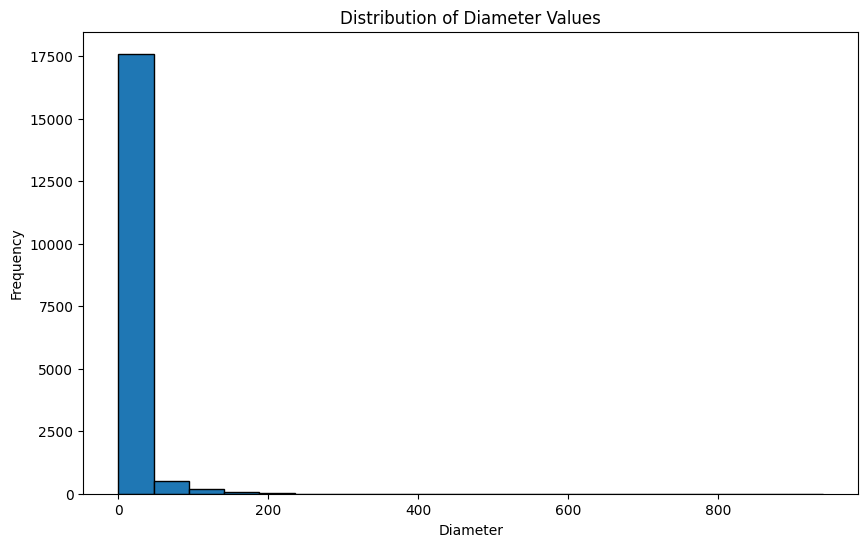

In [20]:
plt.figure(figsize=(10, 6))
plt.hist(diameter_values, bins=20, edgecolor='black')
plt.xlabel('Diameter')
plt.ylabel('Frequency')
plt.title('Distribution of Diameter Values')
plt.show()

## **2.Is there a correlation between the "diameter" and "albedo" columns?**

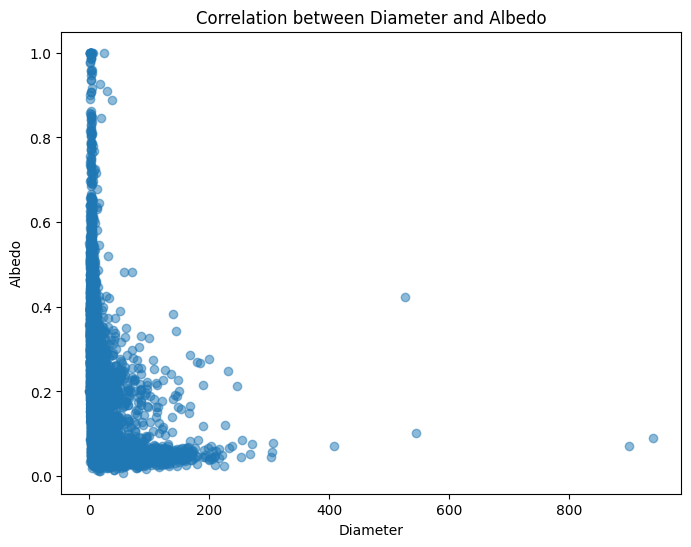

In [21]:
diameter_values = df['diameter']
albedo_values = df['albedo']

plt.figure(figsize=(8, 6))
plt.scatter(diameter_values, albedo_values, alpha=0.5)
plt.xlabel('Diameter')
plt.ylabel('Albedo')
plt.title('Correlation between Diameter and Albedo')
plt.show()

## **3.How many Near-Earth Objects (NEOs) are present in the dataset?**

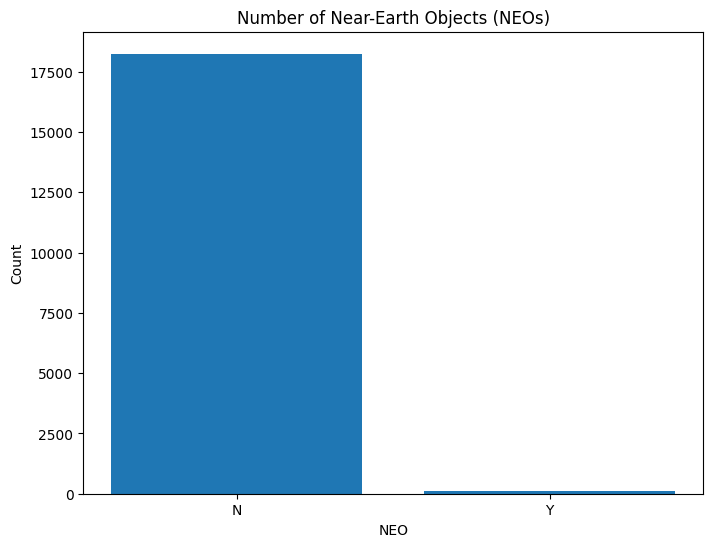

In [22]:
neo_values = df['neo']

neo_counts = neo_values.value_counts()
labels = neo_counts.index
counts = neo_counts.values

plt.figure(figsize=(8, 6))
plt.bar(labels, counts)
plt.xlabel('NEO')
plt.ylabel('Count')
plt.title('Number of Near-Earth Objects (NEOs)')
plt.show()

## **4.What is the most common class of celestial bodies in the dataset?**

<ipython-input-23-8a8d00812ea0>:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_palette = plt.cm.get_cmap('tab20')


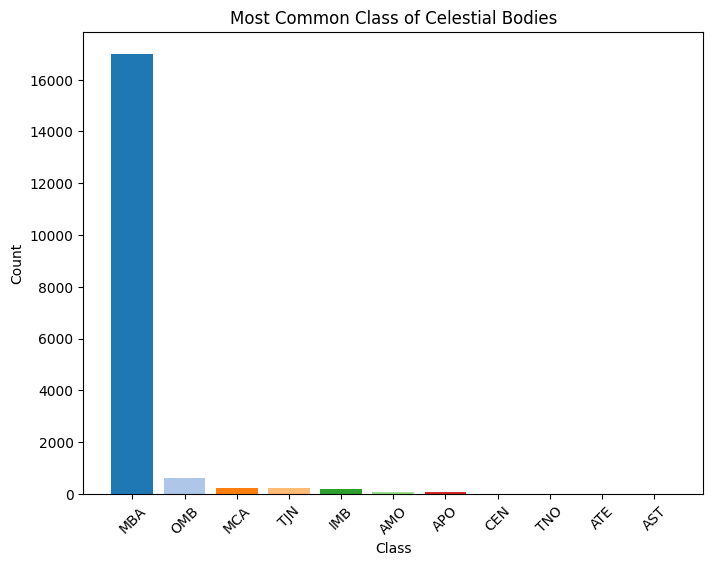

In [23]:
class_counts = df['class'].value_counts()
labels = class_counts.index
counts = class_counts.values

# Define a color palette for the bars
color_palette = plt.cm.get_cmap('tab20')

plt.figure(figsize=(8, 6))
plt.bar(labels, counts, color=color_palette(np.arange(len(labels))))
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Most Common Class of Celestial Bodies')
plt.xticks(rotation=45)
plt.show()

## **5.Are there any outliers in the "H" (absolute magnitude) column?**

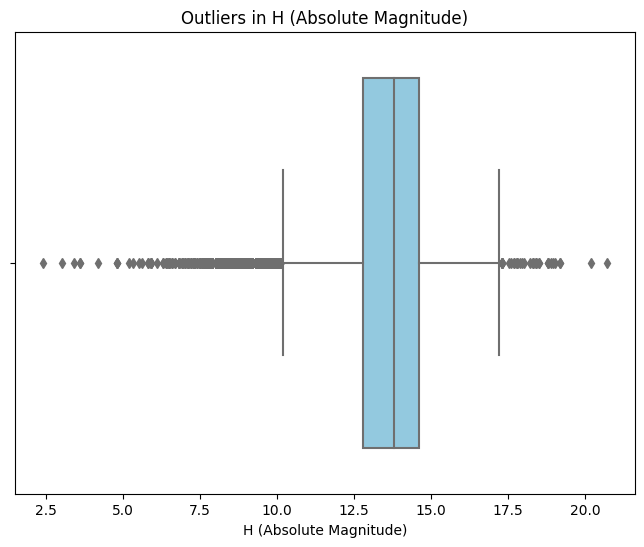

In [24]:
H_values = df['H']

plt.figure(figsize=(8, 6))
sns.boxplot(x=H_values, color='skyblue')
plt.xlabel('H (Absolute Magnitude)')
plt.title('Outliers in H (Absolute Magnitude)')
plt.show()

## **6.How does the average diameter vary across different classes of celestial bodies?**

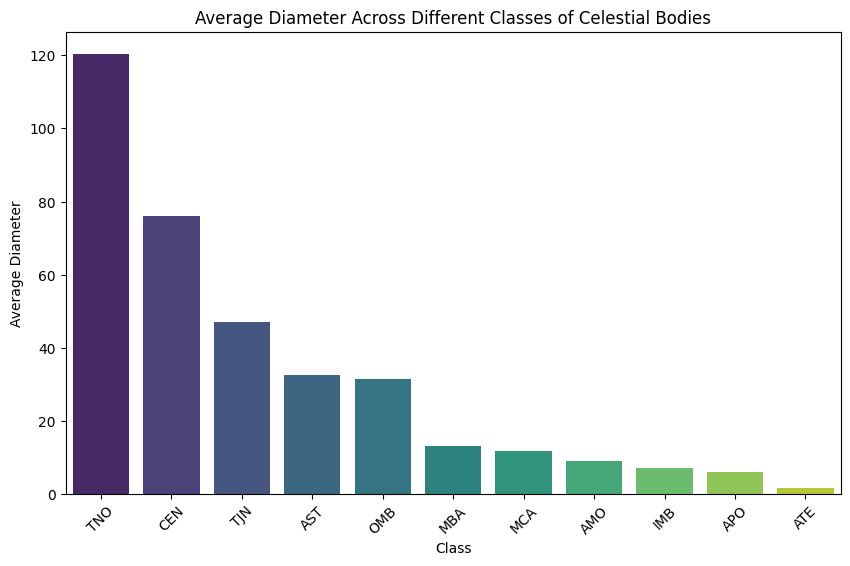

In [25]:
class_average_diameter = df.groupby('class')['diameter'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=class_average_diameter.index, y=class_average_diameter.values, palette='viridis')
plt.xlabel('Class')
plt.ylabel('Average Diameter')
plt.title('Average Diameter Across Different Classes of Celestial Bodies')
plt.xticks(rotation=45)
plt.show()

After analyzing the dataset, the following findings were observed:

1. The overall distribution of the "diameter" values in the dataset reveals a range of sizes, with some smaller and larger celestial bodies present. The exact distribution can be visualized using a histogram or density plot.

2. There is a need to explore further to determine if there is a correlation between the "diameter" and "albedo" columns. Additional analysis, such as calculating correlation coefficients or creating scatter plots, can provide insights into the relationship between these two attributes.

3. The dataset contains a certain number of Near-Earth Objects (NEOs). The exact count of NEOs can be obtained by filtering the dataset based on the NEO classification.

4. The most common class of celestial bodies in the dataset can be identified by analyzing the frequency counts of different classes. The class with the highest count represents the most common class.

5. Outliers are typically identified in the "H" (absolute magnitude) column using box plots. Outliers are data points that fall outside the whiskers of the box plot, indicating extreme values in the dataset.

6. The average diameter varies across different classes of celestial bodies. By calculating the mean diameter for each class, it is possible to observe variations in size among different types of celestial bodies.

In conclusion, the dataset provides insights into the distribution of diameter values, potential correlations between diameter and albedo, the presence of NEOs, the most common class of celestial bodies, the presence of outliers in the absolute magnitude column, and variations in average diameter across different classes. These findings contribute to a better understanding of the characteristics and classifications of celestial bodies in the dataset.